In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
import koreanize_matplotlib

%config InlineBackend.figure_format = 'retina'

In [3]:
# 파일 불러오기
samsung = pd.read_parquet('data/samsung.parquet.gzip')
samsung

event_time event_type  product_id          category_id  \
0         2019-10-01 00:00:11 UTC       view     1005011  2053013555631882655   
1         2019-10-01 00:00:35 UTC       view     3601505  2053013563810775923   
2         2019-10-01 00:00:36 UTC       view     1004767  2053013555631882655   
3         2019-10-01 00:00:55 UTC       view     1004659  2053013555631882655   
4         2019-10-01 00:00:57 UTC       view     1004873  2053013555631882655   
...                           ...        ...         ...                  ...   
13172015  2019-11-30 23:59:47 UTC       view     1003911  2053013555631882655   
13172016  2019-11-30 23:59:50 UTC       view     1700652  2053013553031414015   
13172017  2019-11-30 23:59:54 UTC       view     1005174  2053013555631882655   
13172018  2019-11-30 23:59:59 UTC       view     1004833  2053013555631882655   
13172019  2019-11-30 23:59:59 UTC       view     2701706  2053013563911439225   

                             category_code    brand       price    user_id  \
0                   electronics.smartphone  samsung  900.640015  530282093   
1                appliances.kitchen.washer  samsung  463.149994  526631741   
2                   electronics.smartphone  samsung  254.820007  512558158   
3                   electronics.smartphone  samsung  787.179993  512558158   
4                   electronics.smartphone  samsung  388.809998  555447651   
...                                    ...      ...         ...        ...   
13172015            electronics.smartphone  samsung  177.100006  578678977   
13172016     computers.peripherals.monitor  samsung   96.779999  579962208   
13172017            electronics.smartphone  samsung  591.750000  579969525   
13172018            electronics.smartphone  samsung  167.029999  557794415   
13172019  appliances.kitchen.refrigerators  samsung  566.270020  531607492   

                                  user_session  
0         50a293fb-5940-41b2-baf3-17af0e812101  
1         5ec9bd77-beef-443e-b987-62ffb55b8132  
2         9a206ba2-37c7-4354-9d31-37ff3bb297ed  
3         9a206ba2-37c7-4354-9d31-37ff3bb297ed  
4         c3240a5e-6cb8-4d78-9732-a63c608444ef  
...                                        ...  
13172015  fc4e8bda-1545-4ed3-aec2-df7805c03d0d  
13172016  b12833a5-9770-4527-9dfe-ce6d1fe070c4  
13172017  180a7f1f-ed0c-485a-b145-a980716d6abb  
13172018  6fecf566-ebb0-4e70-a243-cdc13ce044cb  
13172019  368ddc8b-5db9-40fb-b7ff-b6582a1192c0  

[13172020 rows x 9 columns]

In [4]:
# 필요없는 컬럼 제거
samsung = samsung.drop('category_id', axis=1)
samsung

event_time event_type  product_id  \
0         2019-10-01 00:00:11 UTC       view     1005011   
1         2019-10-01 00:00:35 UTC       view     3601505   
2         2019-10-01 00:00:36 UTC       view     1004767   
3         2019-10-01 00:00:55 UTC       view     1004659   
4         2019-10-01 00:00:57 UTC       view     1004873   
...                           ...        ...         ...   
13172015  2019-11-30 23:59:47 UTC       view     1003911   
13172016  2019-11-30 23:59:50 UTC       view     1700652   
13172017  2019-11-30 23:59:54 UTC       view     1005174   
13172018  2019-11-30 23:59:59 UTC       view     1004833   
13172019  2019-11-30 23:59:59 UTC       view     2701706   

                             category_code    brand       price    user_id  \
0                   electronics.smartphone  samsung  900.640015  530282093   
1                appliances.kitchen.washer  samsung  463.149994  526631741   
2                   electronics.smartphone  samsung  254.820007  512558158   
3                   electronics.smartphone  samsung  787.179993  512558158   
4                   electronics.smartphone  samsung  388.809998  555447651   
...                                    ...      ...         ...        ...   
13172015            electronics.smartphone  samsung  177.100006  578678977   
13172016     computers.peripherals.monitor  samsung   96.779999  579962208   
13172017            electronics.smartphone  samsung  591.750000  579969525   
13172018            electronics.smartphone  samsung  167.029999  557794415   
13172019  appliances.kitchen.refrigerators  samsung  566.270020  531607492   

                                  user_session  
0         50a293fb-5940-41b2-baf3-17af0e812101  
1         5ec9bd77-beef-443e-b987-62ffb55b8132  
2         9a206ba2-37c7-4354-9d31-37ff3bb297ed  
3         9a206ba2-37c7-4354-9d31-37ff3bb297ed  
4         c3240a5e-6cb8-4d78-9732-a63c608444ef  
...                                        ...  
13172015  fc4e8bda-1545-4ed3-aec2-df7805c03d0d  
13172016  b12833a5-9770-4527-9dfe-ce6d1fe070c4  
13172017  180a7f1f-ed0c-485a-b145-a980716d6abb  
13172018  6fecf566-ebb0-4e70-a243-cdc13ce044cb  
13172019  368ddc8b-5db9-40fb-b7ff-b6582a1192c0  

[13172020 rows x 8 columns]

In [5]:
# event_time datetime형태로!
samsung['event_time'] = pd.to_datetime(samsung['event_time'].str[:-4])

In [6]:
# 구매 데이터만 뽑기!
df_for_rfm = samsung[samsung['event_type'] == 'purchase']
df_for_rfm

event_time event_type  product_id           category_code  \
23       2019-10-01 00:02:14   purchase     1004856  electronics.smartphone   
294      2019-10-01 02:21:02   purchase     1004659  electronics.smartphone   
360      2019-10-01 02:22:11   purchase     1004750  electronics.smartphone   
375      2019-10-01 02:22:31   purchase     5100719      electronics.clocks   
405      2019-10-01 02:23:10   purchase     1004856  electronics.smartphone   
...                      ...        ...         ...                     ...   
13171982 2019-11-30 23:57:23   purchase     1005212  electronics.smartphone   
13171983 2019-11-30 23:57:30   purchase     1004874  electronics.smartphone   
13171993 2019-11-30 23:58:08   purchase     1004767  electronics.smartphone   
13171995 2019-11-30 23:58:14   purchase     1004874  electronics.smartphone   
13172009 2019-11-30 23:58:57   purchase     1004767  electronics.smartphone   

            brand       price    user_id                          user_session  
23        samsung  130.759995  543272936  8187d148-3c41-46d4-b0c0-9c08cd9dc564  
294       samsung  787.179993  555168263  d068d08f-aaf3-4949-b031-cdaf49a5c7cf  
360       samsung  197.429993  555110488  ce885079-4d92-4fe6-92a3-377c5a2d8291  
375       samsung  151.610001  549614436  129d379f-0137-4bd5-bf30-90c4c7bef7c8  
405       samsung  130.759995  550146179  4078566a-62e6-4258-b623-87812d27aa62  
...           ...         ...        ...                                   ...  
13171982  samsung  169.089996  557794415  068b0939-1d19-4289-90d8-bb0ee2a3547a  
13171983  samsung  346.700012  547804983  717566cf-ef93-4078-ba8f-169a3ac9f1a0  
13171993  samsung  235.600006  574868869  878a1538-ebe3-4d7f-b773-1b057b1971eb  
13171995  samsung  346.700012  547804983  717566cf-ef93-4078-ba8f-169a3ac9f1a0  
13172009  samsung  235.600006  579876821  ca50e291-43f3-4ca2-9e13-20ee6b8b25f0  

[372923 rows x 8 columns]

In [7]:
# 중복 제거
df_for_rfm = df_for_rfm.drop_duplicates()
df_for_rfm

event_time event_type  product_id           category_code  \
23       2019-10-01 00:02:14   purchase     1004856  electronics.smartphone   
294      2019-10-01 02:21:02   purchase     1004659  electronics.smartphone   
360      2019-10-01 02:22:11   purchase     1004750  electronics.smartphone   
375      2019-10-01 02:22:31   purchase     5100719      electronics.clocks   
405      2019-10-01 02:23:10   purchase     1004856  electronics.smartphone   
...                      ...        ...         ...                     ...   
13171982 2019-11-30 23:57:23   purchase     1005212  electronics.smartphone   
13171983 2019-11-30 23:57:30   purchase     1004874  electronics.smartphone   
13171993 2019-11-30 23:58:08   purchase     1004767  electronics.smartphone   
13171995 2019-11-30 23:58:14   purchase     1004874  electronics.smartphone   
13172009 2019-11-30 23:58:57   purchase     1004767  electronics.smartphone   

            brand       price    user_id                          user_session  
23        samsung  130.759995  543272936  8187d148-3c41-46d4-b0c0-9c08cd9dc564  
294       samsung  787.179993  555168263  d068d08f-aaf3-4949-b031-cdaf49a5c7cf  
360       samsung  197.429993  555110488  ce885079-4d92-4fe6-92a3-377c5a2d8291  
375       samsung  151.610001  549614436  129d379f-0137-4bd5-bf30-90c4c7bef7c8  
405       samsung  130.759995  550146179  4078566a-62e6-4258-b623-87812d27aa62  
...           ...         ...        ...                                   ...  
13171982  samsung  169.089996  557794415  068b0939-1d19-4289-90d8-bb0ee2a3547a  
13171983  samsung  346.700012  547804983  717566cf-ef93-4078-ba8f-169a3ac9f1a0  
13171993  samsung  235.600006  574868869  878a1538-ebe3-4d7f-b773-1b057b1971eb  
13171995  samsung  346.700012  547804983  717566cf-ef93-4078-ba8f-169a3ac9f1a0  
13172009  samsung  235.600006  579876821  ca50e291-43f3-4ca2-9e13-20ee6b8b25f0  

[372904 rows x 8 columns]

In [8]:
# RFM데이터, 세션 기준으로 함
# 판매 수는 user_id가 아닌, user_session와 비례하므로 요것을 병합해야함
# user_id : user_id. 구매한 유저 동일해서 그냥 고유값 하나 아무거나 가져오면 댐. 다 동일함
# event_time : 같은 구매 기준 최대 날짜
# user_session : user_session 카운트 : 한 번에 몇 개 샀는지 체크.
# price : 건당 지출금액 (근데 품목이 다른 것도 그냥 같이 계산...)
df_for_rfm = df_for_rfm.groupby('user_session').agg({'user_id':'unique',
                                                     'event_time':lambda x : x.max(),
                                                     'user_session':'count',
                                                     'price':'sum'})
df_for_rfm

user_id          event_time  \
user_session                                                            
00000083-8816-4d58-a9b8-f52f54186edc  [546521725] 2019-10-06 11:34:30   
000001fd-1f89-45e8-a3ce-fe3218cabfad  [560486342] 2019-10-25 08:39:11   
00003e3b-b365-4460-bf59-fcc0c1491c97  [566954797] 2019-11-11 03:35:34   
000081ea-9376-4eb8-a69b-0b592765a21d  [513622224] 2019-10-24 09:08:58   
0000de39-dc74-414d-8da6-83ad56135bf5  [561610048] 2019-10-19 11:15:20   
...                                           ...                 ...   
ffff8662-b7a6-4a28-9389-3bc7afdfa6c5  [530408758] 2019-11-11 11:02:45   
ffff9093-1f33-4751-811e-2adcc98930e4  [516516131] 2019-11-05 04:54:08   
ffffb69f-e3f9-4271-876f-d894920fa911  [521378371] 2019-11-17 14:47:28   
ffffb94a-cea4-429d-ba4a-7e47a6f28171  [513821974] 2019-11-24 08:34:23   
fffffd01-5f95-4916-b2dd-491c603d6c9c  [519073108] 2019-11-17 14:12:02   

                                      user_session       price  
user_session                                                    
00000083-8816-4d58-a9b8-f52f54186edc             1  289.519989  
000001fd-1f89-45e8-a3ce-fe3218cabfad             1  171.899994  
00003e3b-b365-4460-bf59-fcc0c1491c97             1  151.610001  
000081ea-9376-4eb8-a69b-0b592765a21d             1  131.509995  
0000de39-dc74-414d-8da6-83ad56135bf5             2  422.000000  
...                                            ...         ...  
ffff8662-b7a6-4a28-9389-3bc7afdfa6c5             1  243.509995  
ffff9093-1f33-4751-811e-2adcc98930e4             1  170.070007  
ffffb69f-e3f9-4271-876f-d894920fa911             1  269.970001  
ffffb94a-cea4-429d-ba4a-7e47a6f28171             1  977.859985  
fffffd01-5f95-4916-b2dd-491c603d6c9c             1  128.419998  

[323051 rows x 4 columns]

In [9]:
# user_id 대괄호 제거!
df_for_rfm['user_id'] = df_for_rfm['user_id'].astype('str').str[1:10]
df_for_rfm

user_id          event_time  \
user_session                                                          
00000083-8816-4d58-a9b8-f52f54186edc  546521725 2019-10-06 11:34:30   
000001fd-1f89-45e8-a3ce-fe3218cabfad  560486342 2019-10-25 08:39:11   
00003e3b-b365-4460-bf59-fcc0c1491c97  566954797 2019-11-11 03:35:34   
000081ea-9376-4eb8-a69b-0b592765a21d  513622224 2019-10-24 09:08:58   
0000de39-dc74-414d-8da6-83ad56135bf5  561610048 2019-10-19 11:15:20   
...                                         ...                 ...   
ffff8662-b7a6-4a28-9389-3bc7afdfa6c5  530408758 2019-11-11 11:02:45   
ffff9093-1f33-4751-811e-2adcc98930e4  516516131 2019-11-05 04:54:08   
ffffb69f-e3f9-4271-876f-d894920fa911  521378371 2019-11-17 14:47:28   
ffffb94a-cea4-429d-ba4a-7e47a6f28171  513821974 2019-11-24 08:34:23   
fffffd01-5f95-4916-b2dd-491c603d6c9c  519073108 2019-11-17 14:12:02   

                                      user_session       price  
user_session                                                    
00000083-8816-4d58-a9b8-f52f54186edc             1  289.519989  
000001fd-1f89-45e8-a3ce-fe3218cabfad             1  171.899994  
00003e3b-b365-4460-bf59-fcc0c1491c97             1  151.610001  
000081ea-9376-4eb8-a69b-0b592765a21d             1  131.509995  
0000de39-dc74-414d-8da6-83ad56135bf5             2  422.000000  
...                                            ...         ...  
ffff8662-b7a6-4a28-9389-3bc7afdfa6c5             1  243.509995  
ffff9093-1f33-4751-811e-2adcc98930e4             1  170.070007  
ffffb69f-e3f9-4271-876f-d894920fa911             1  269.970001  
ffffb94a-cea4-429d-ba4a-7e47a6f28171             1  977.859985  
fffffd01-5f95-4916-b2dd-491c603d6c9c             1  128.419998  

[323051 rows x 4 columns]

In [10]:
# Recency를 위한 기준날짜!
last_timestamp = df_for_rfm['event_time'].max() + dt.timedelta(days=1)
last_timestamp

Timestamp('2019-12-01 23:58:57')

In [11]:
# rfm데이터 생성!
rfm = df_for_rfm.groupby(by='user_id').agg({"event_time":lambda x: (last_timestamp - x.max()).days,
                                            "user_id":"count", 
                                            "price":"sum"})
rfm

event_time  user_id        price
user_id                                    
315835876           7        1   169.889999
366237542          12        1   126.900002
389051600          20        1   229.910004
403013066          44        1   229.220001
415873351          31        1   263.059998
...               ...      ...          ...
579953265           1        1  1544.160034
579953464           1        1   124.110001
579956024           1        1   282.089996
579966375           1        1   124.110001
579967058           1        1   124.110001

[192790 rows x 3 columns]

In [12]:
# 컬럼명 지정
rfm.columns = ['Recency', 'Frequency', 'MonetaryValue']
rfm

Recency  Frequency  MonetaryValue
user_id                                     
315835876        7          1     169.889999
366237542       12          1     126.900002
389051600       20          1     229.910004
403013066       44          1     229.220001
415873351       31          1     263.059998
...            ...        ...            ...
579953265        1          1    1544.160034
579953464        1          1     124.110001
579956024        1          1     282.089996
579966375        1          1     124.110001
579967058        1          1     124.110001

[192790 rows x 3 columns]

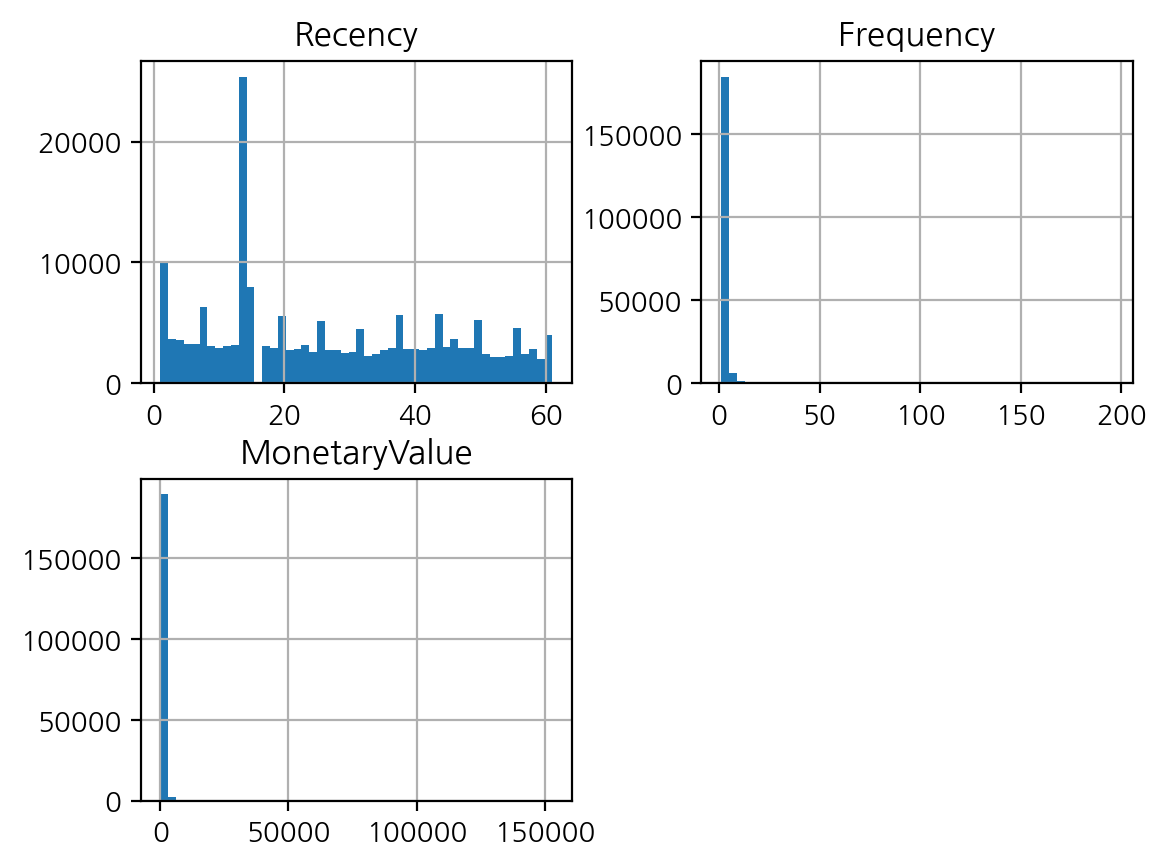

In [13]:
# 분포보기 F랑 M만 좀 쏠려있음
rfm.hist(bins=50);

Text(0.5, 0, 'MonetaryValue')

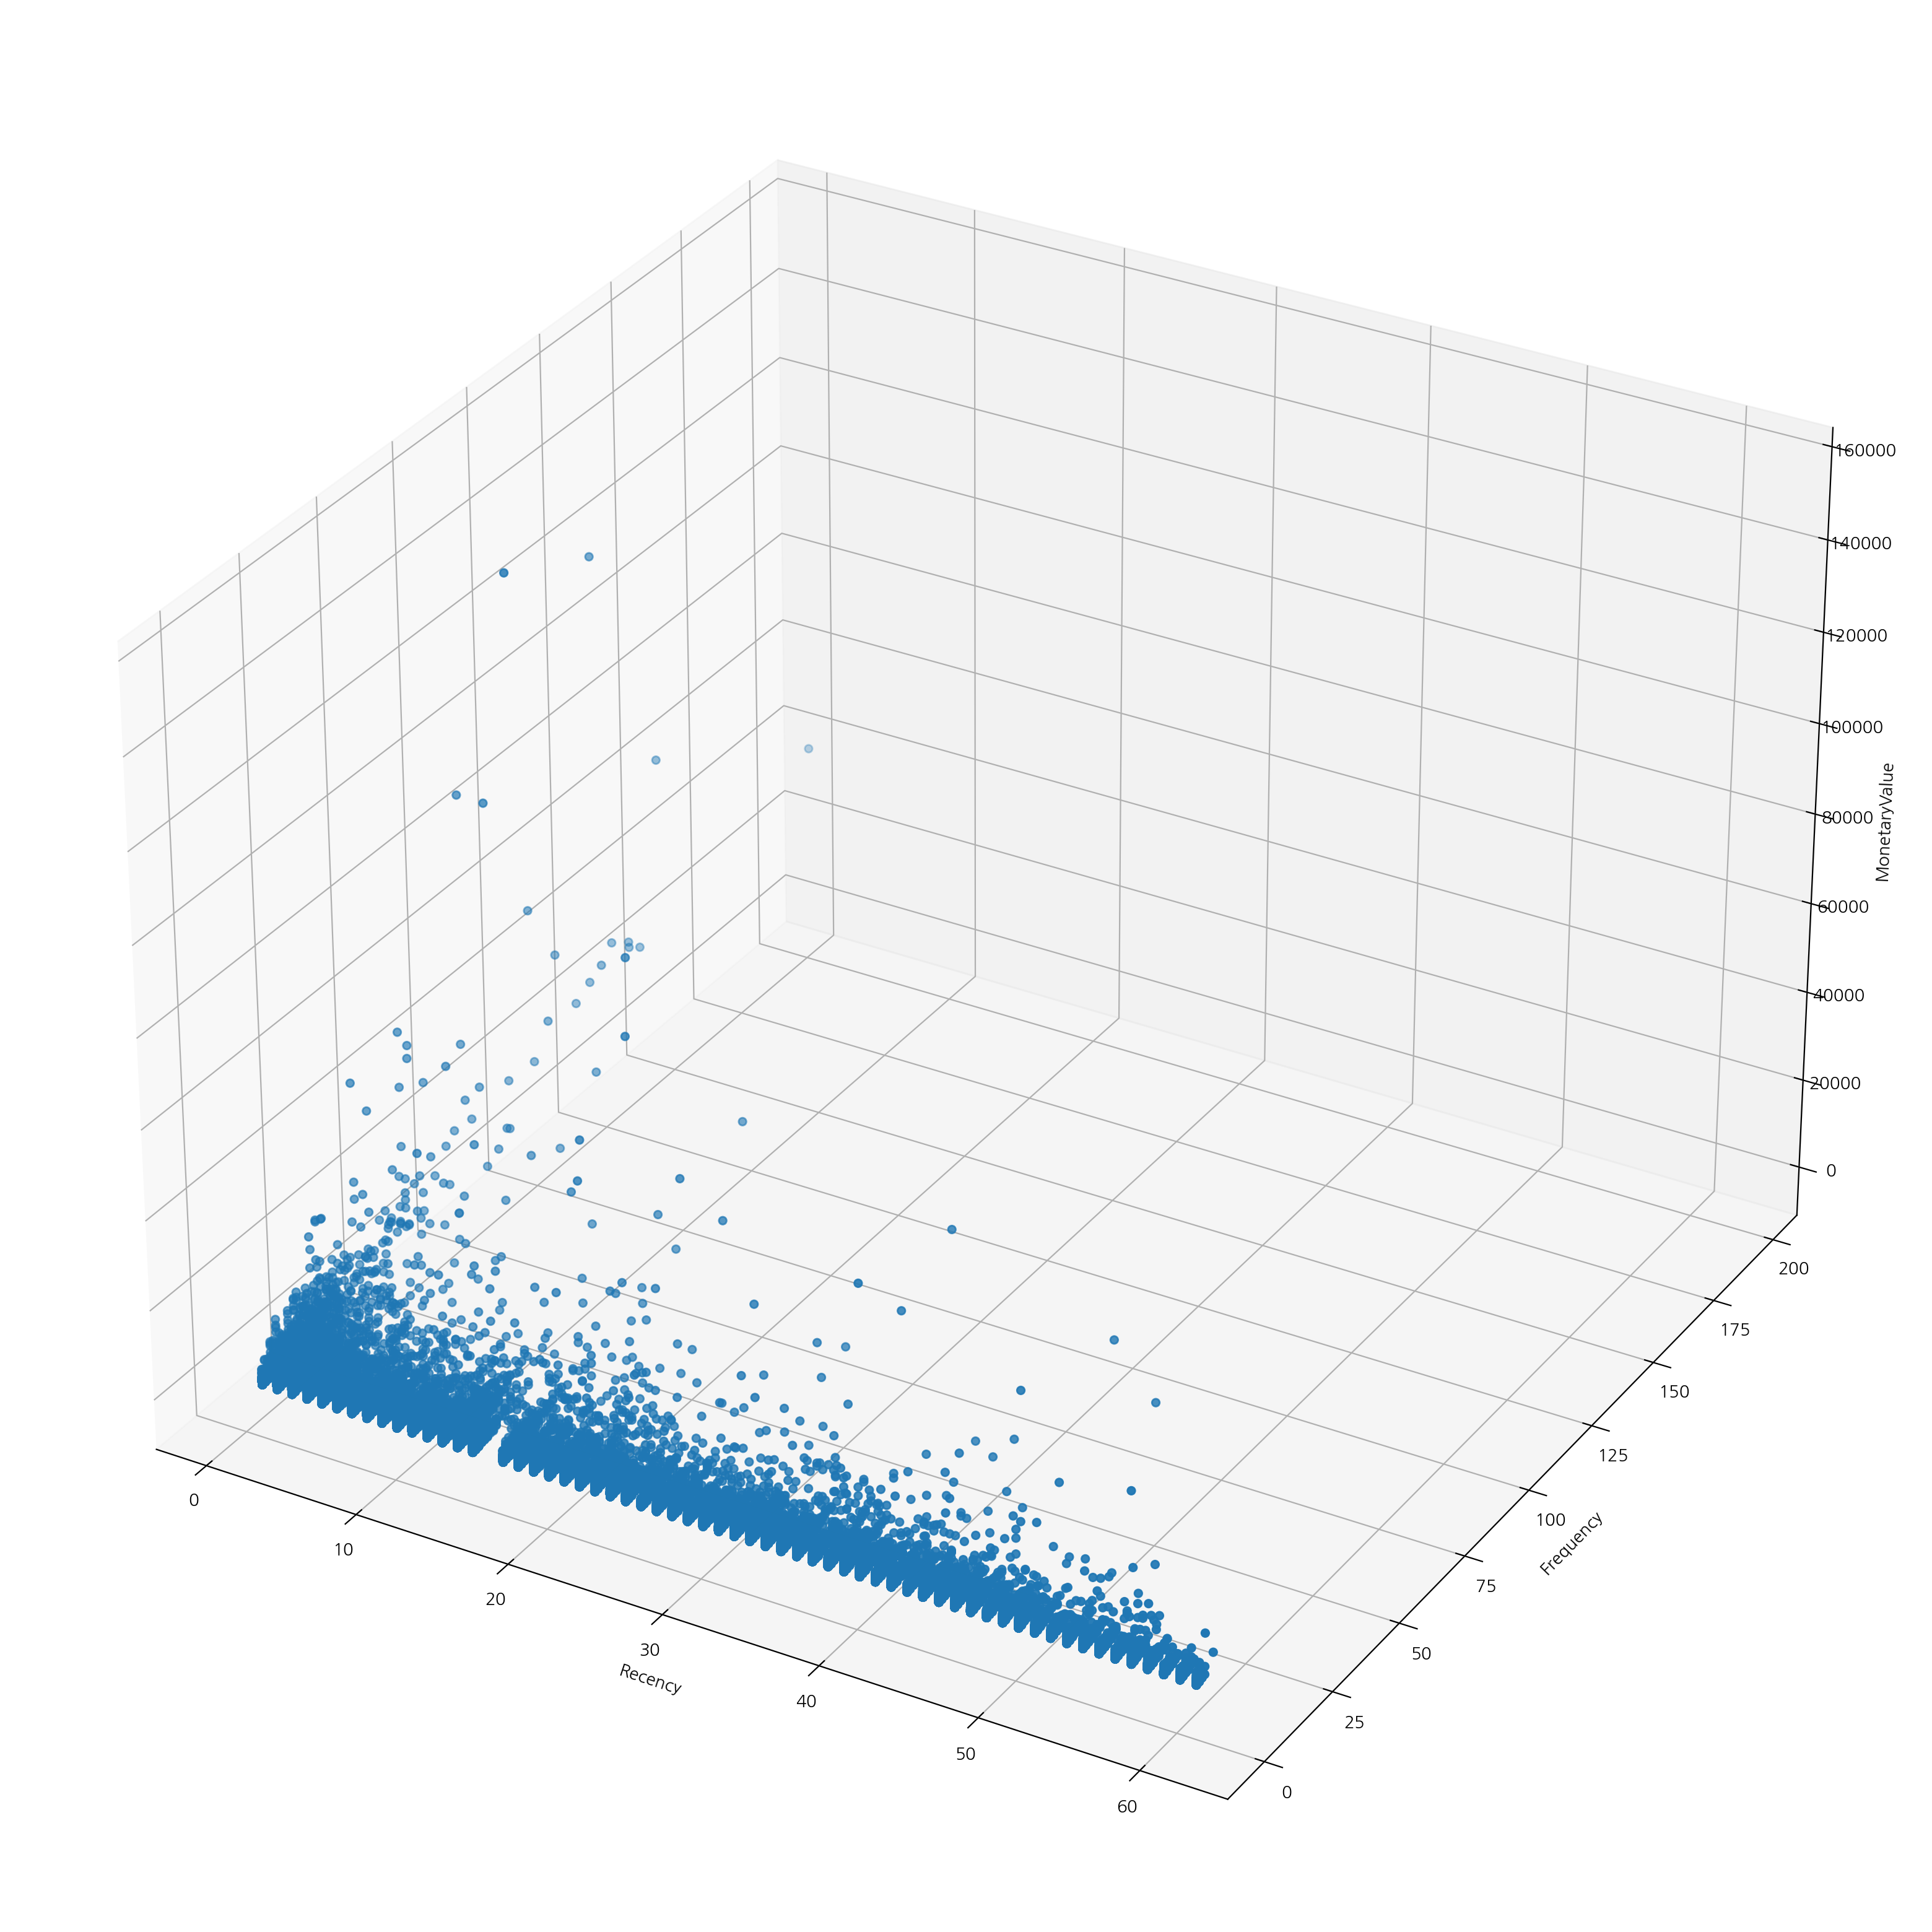

In [14]:
# 3차원에서 마지막 분포 확인
plt.figure(figsize=(20, 20))
ax = plt.axes(projection='3d')
ax.scatter3D(rfm['Recency'], rfm['Frequency'], rfm['MonetaryValue']);
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('MonetaryValue')
# Recency뺴고는 다 몰려있음!

In [15]:
# 수치변수 기술통계 확인
rfm.describe()

Recency      Frequency  MonetaryValue
count  192790.000000  192790.000000  192790.000000
mean       27.093132       1.675663     525.246765
std        17.480777       2.417129    1227.559326
min         1.000000       1.000000       1.260000
25%        14.000000       1.000000     163.762493
50%        24.000000       1.000000     265.099976
75%        42.000000       2.000000     529.729980
max        61.000000     196.000000  152926.296875

In [16]:
rfm.describe()

Recency      Frequency  MonetaryValue
count  192790.000000  192790.000000  192790.000000
mean       27.093132       1.675663     525.246765
std        17.480777       2.417129    1227.559326
min         1.000000       1.000000       1.260000
25%        14.000000       1.000000     163.762493
50%        24.000000       1.000000     265.099976
75%        42.000000       2.000000     529.729980
max        61.000000     196.000000  152926.296875

In [17]:
# 로그변환
rfm_log = np.log(rfm + 1)
rfm_log

Recency  Frequency  MonetaryValue
user_id                                      
315835876  2.079442   0.693147       5.141020
366237542  2.564949   0.693147       4.851249
389051600  3.044522   0.693147       5.442028
403013066  3.806662   0.693147       5.439035
415873351  3.465736   0.693147       5.576176
...             ...        ...            ...
579953265  0.693147   0.693147       7.342883
579953464  0.693147   0.693147       4.829194
579956024  0.693147   0.693147       5.645765
579966375  0.693147   0.693147       4.829194
579967058  0.693147   0.693147       4.829194

[192790 rows x 3 columns]

In [18]:
rfm_log.describe()

Recency      Frequency  MonetaryValue
count  192790.000000  192790.000000  192790.000000
mean        3.058493       0.877424       5.748604
std         0.848483       0.372087       0.897777
min         0.693147       0.693147       0.815365
25%         2.708050       0.693147       5.104505
50%         3.218876       0.693147       5.583872
75%         3.761200       1.098612       6.274253
max         4.127134       5.283204      11.937717

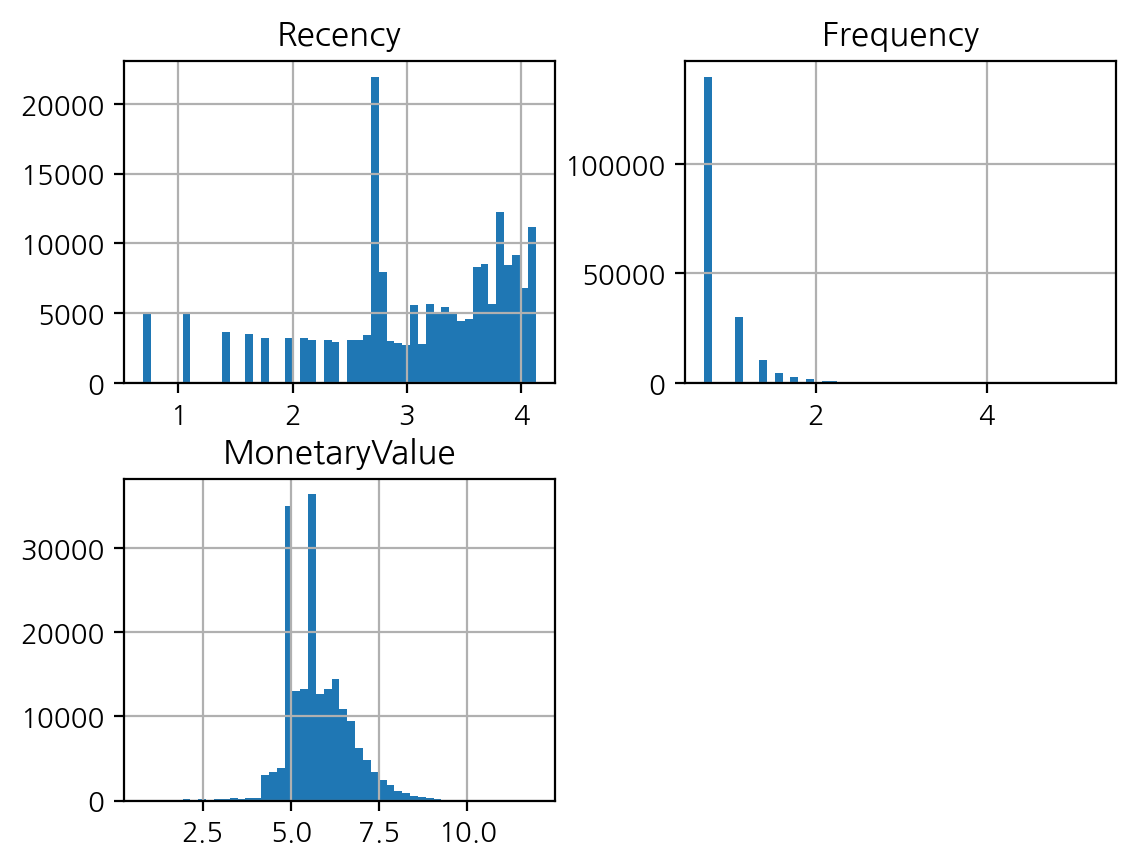

In [19]:
# 로그 변환 후 분포 확인
rfm_log.hist(bins=50);

In [41]:
# 적절히 선택해서 러닝머신 돌릴 데이터프레임 만들기
rfm_final = pd.concat([rfm['Recency'], rfm_log[['Frequency', 'MonetaryValue']]], axis=1)
rfm_final

Recency  Frequency  MonetaryValue
user_id                                     
315835876        7   0.693147       5.141020
366237542       12   0.693147       4.851249
389051600       20   0.693147       5.442028
403013066       44   0.693147       5.439035
415873351       31   0.693147       5.576176
...            ...        ...            ...
579953265        1   0.693147       7.342883
579953464        1   0.693147       4.829194
579956024        1   0.693147       5.645765
579966375        1   0.693147       4.829194
579967058        1   0.693147       4.829194

[192790 rows x 3 columns]

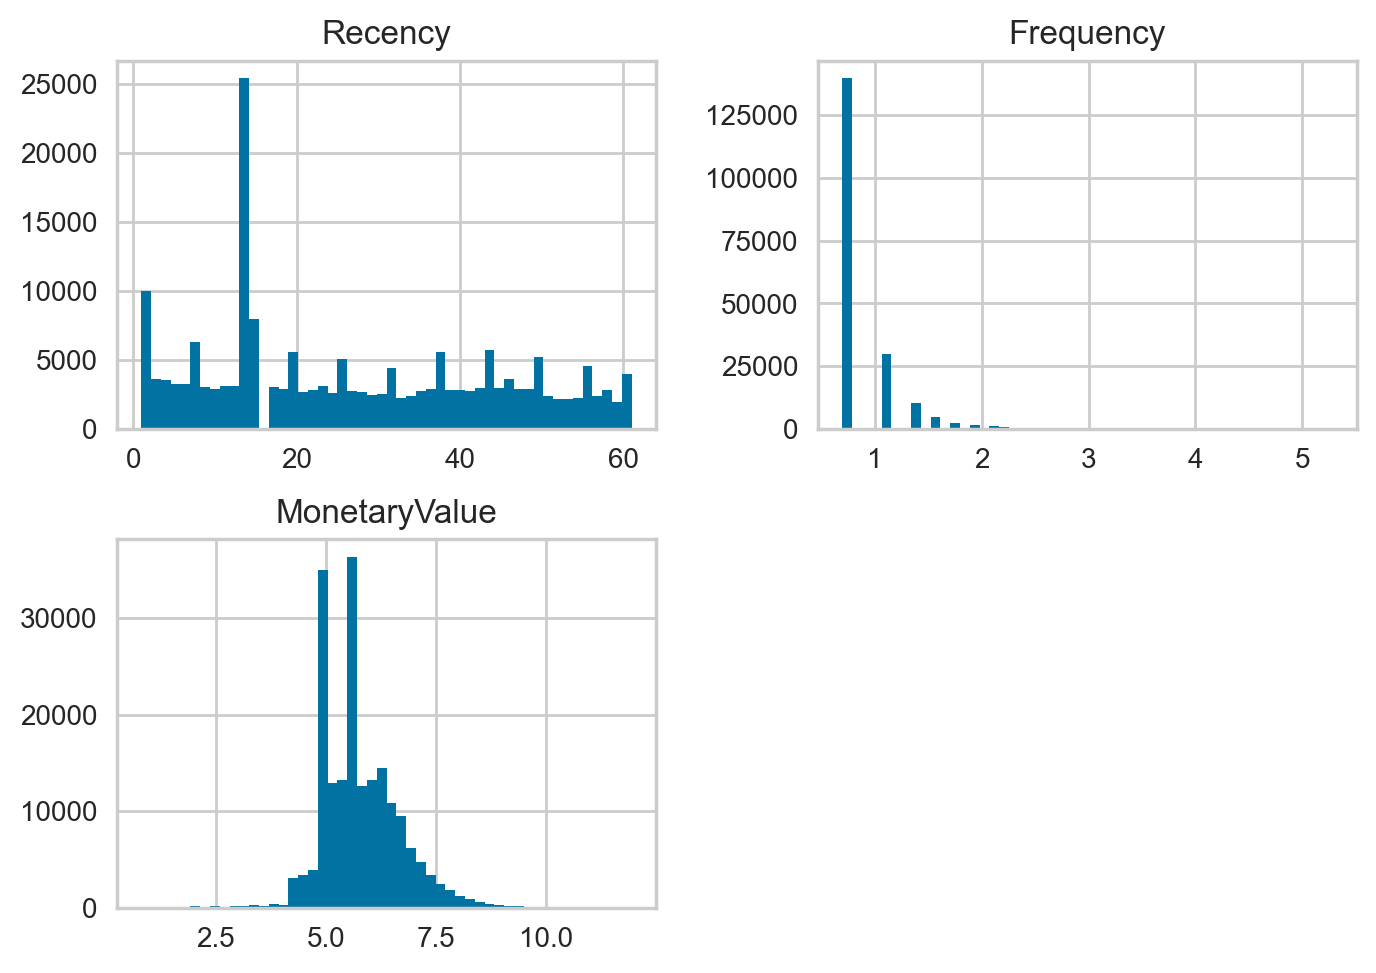

In [42]:
# 분포 확인
rfm_final.hist(bins=50);

Text(0.5, 0, 'MonetaryValue')

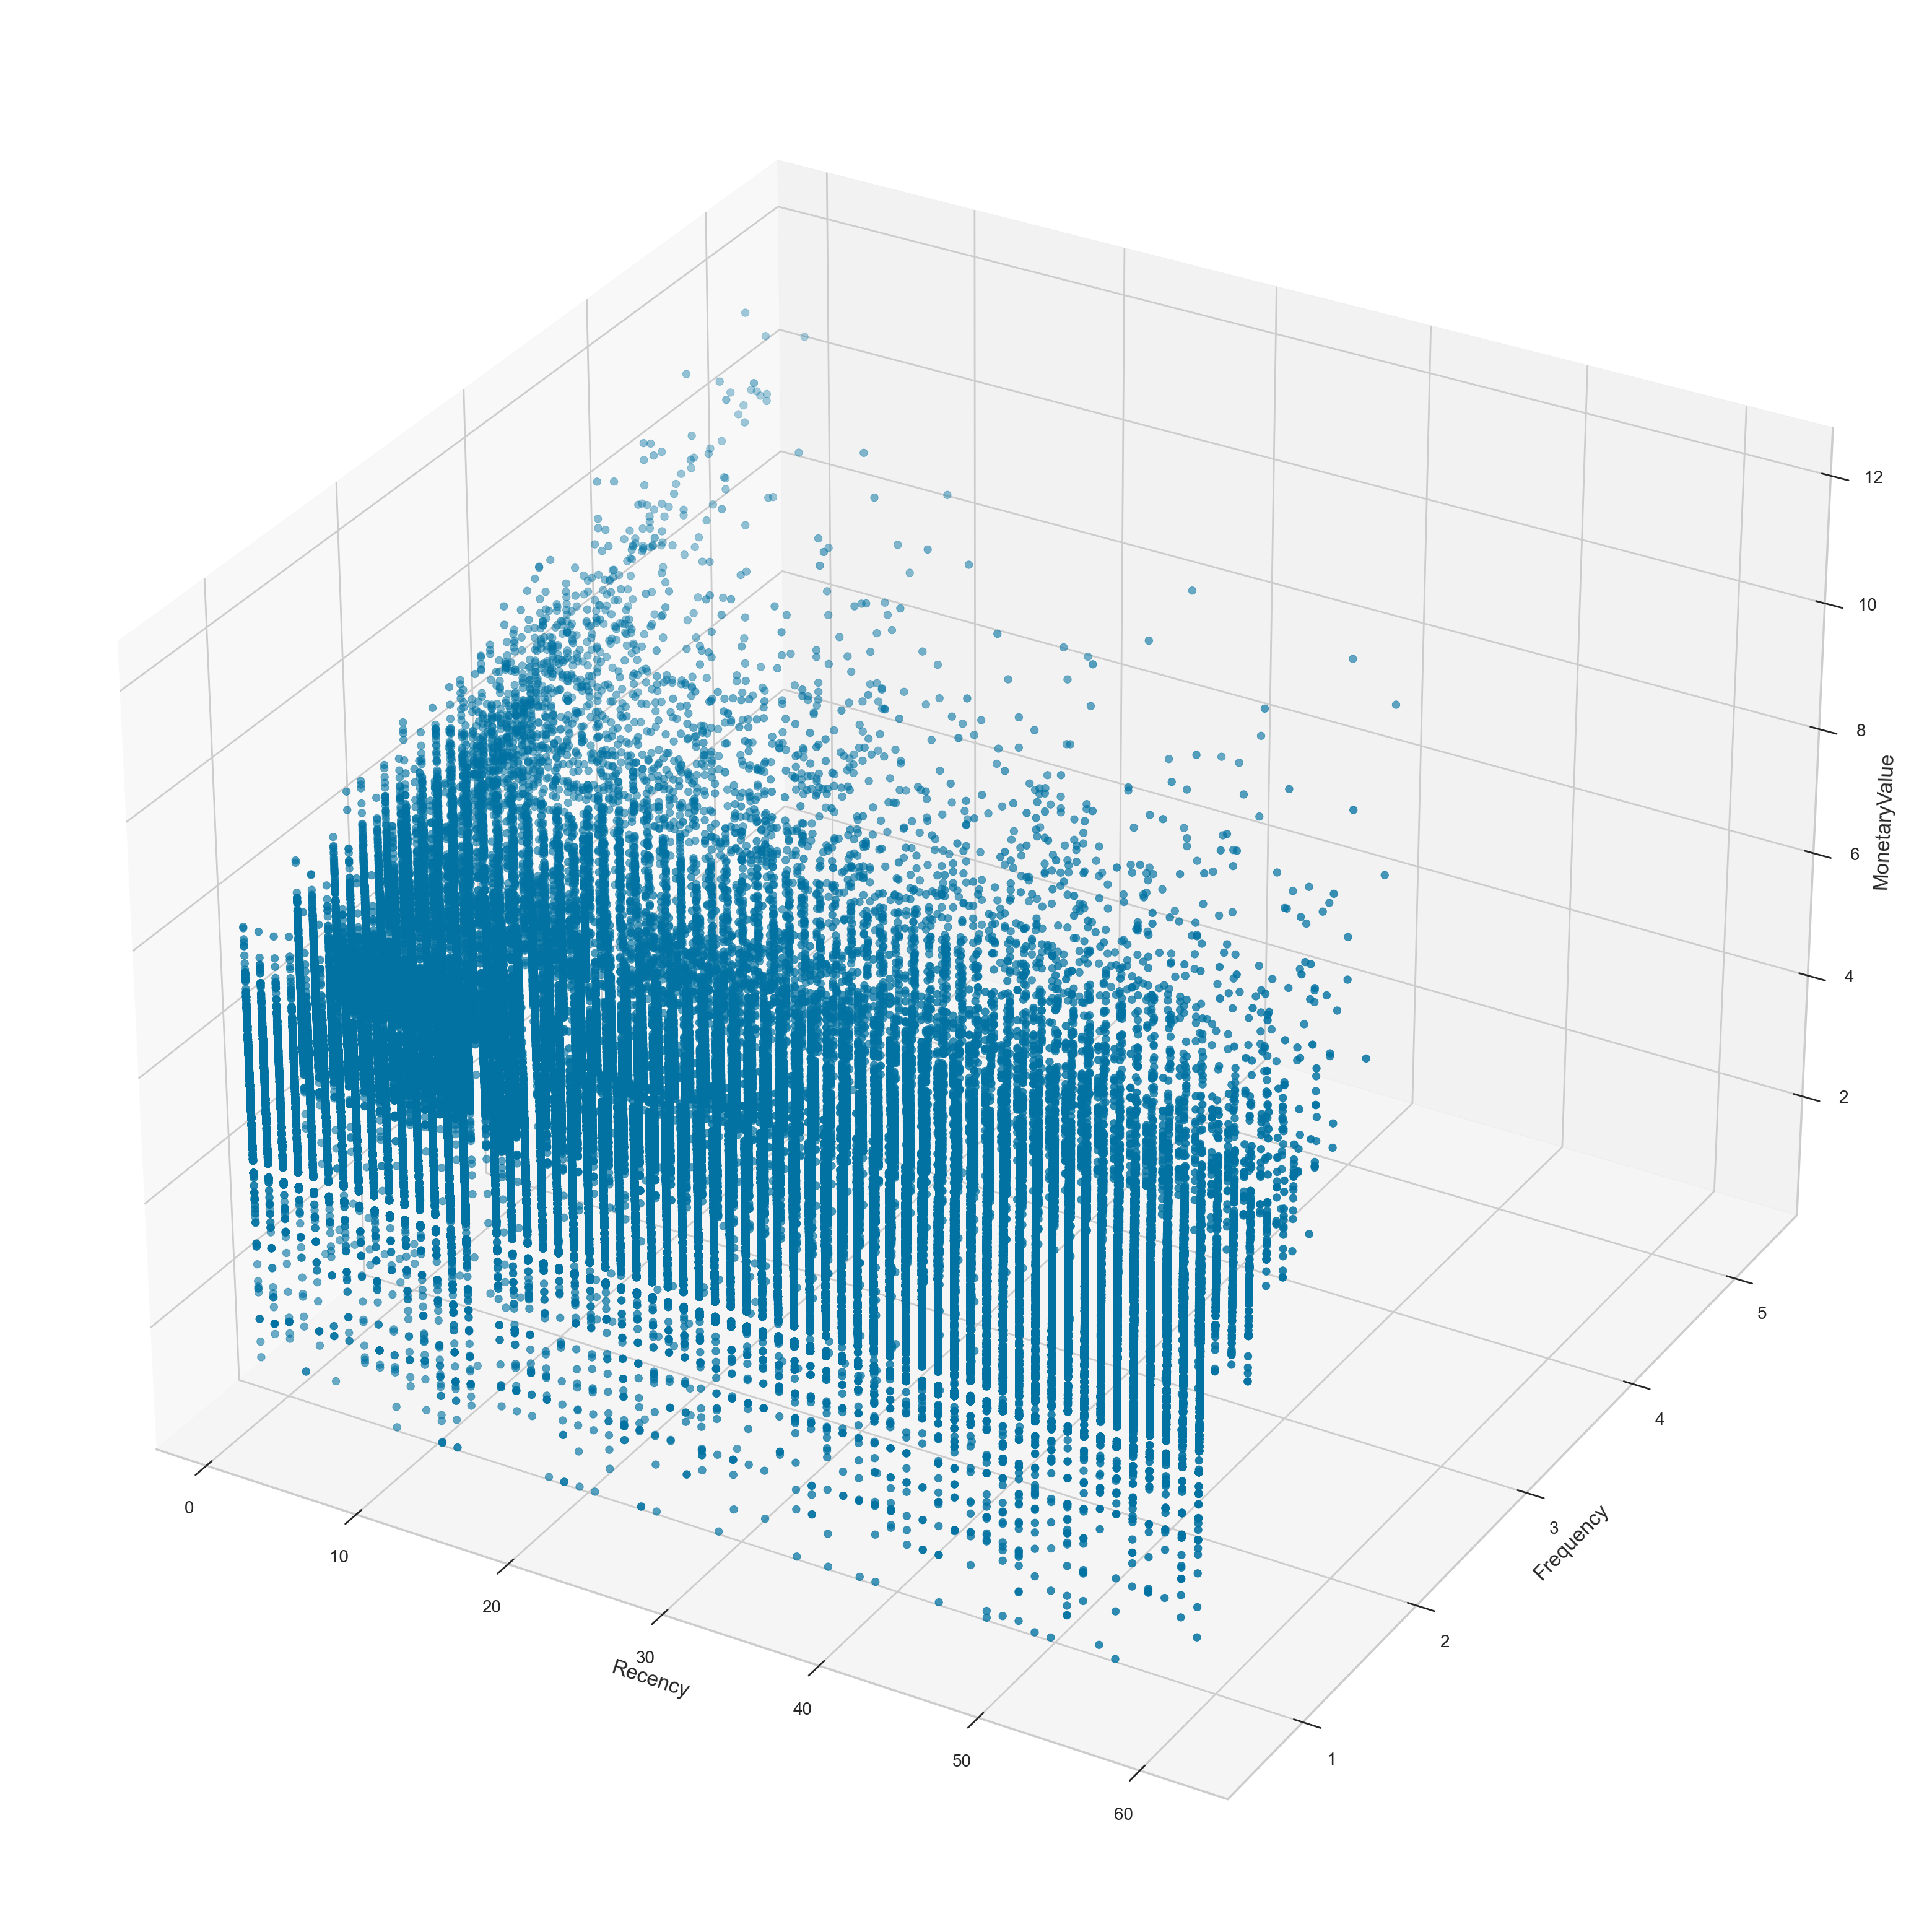

In [43]:
# 3차원에서 마지막 분포 확인
plt.figure(figsize=(20, 20))
ax = plt.axes(projection='3d')
ax.scatter3D(rfm_final['Recency'], rfm_final['Frequency'], rfm_final['MonetaryValue']);
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('MonetaryValue')
# 그나마 골고루 퍼졌다?

In [23]:
# sklearn.preprocessing 의 StandardScaler 로 변환
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(rfm_final)
X = ss.transform(rfm_final)
X

array([[-1.14944461, -0.49525414, -0.67751636],
       [-0.86341539, -0.49525414, -1.00027536],
       [-0.40576863, -0.49525414, -0.34224205],
       ...,
       [-1.49267968, -0.49525414, -0.11531199],
       [-1.49267968, -0.49525414, -1.02484125],
       [-1.49267968, -0.49525414, -1.02484125]])

In [24]:
pd.DataFrame(X).describe().round(2)

0          1          2
count  192790.00  192790.00  192790.00
mean        0.00      -0.00      -0.00
std         1.00       1.00       1.00
min        -1.49      -0.50      -5.50
25%        -0.75      -0.50      -0.72
50%        -0.18      -0.50      -0.18
75%         0.85       0.59       0.58
max         1.94      11.84       6.89

In [27]:
# kmeans알고리즘 군집 2~10까지
from sklearn.cluster import KMeans

range_n_clusters = range(2, 11)

for n_cluster in range_n_clusters:
    kmeans = KMeans(n_clusters=n_cluster, random_state=42, n_init='auto')
    kmeans.fit(X)

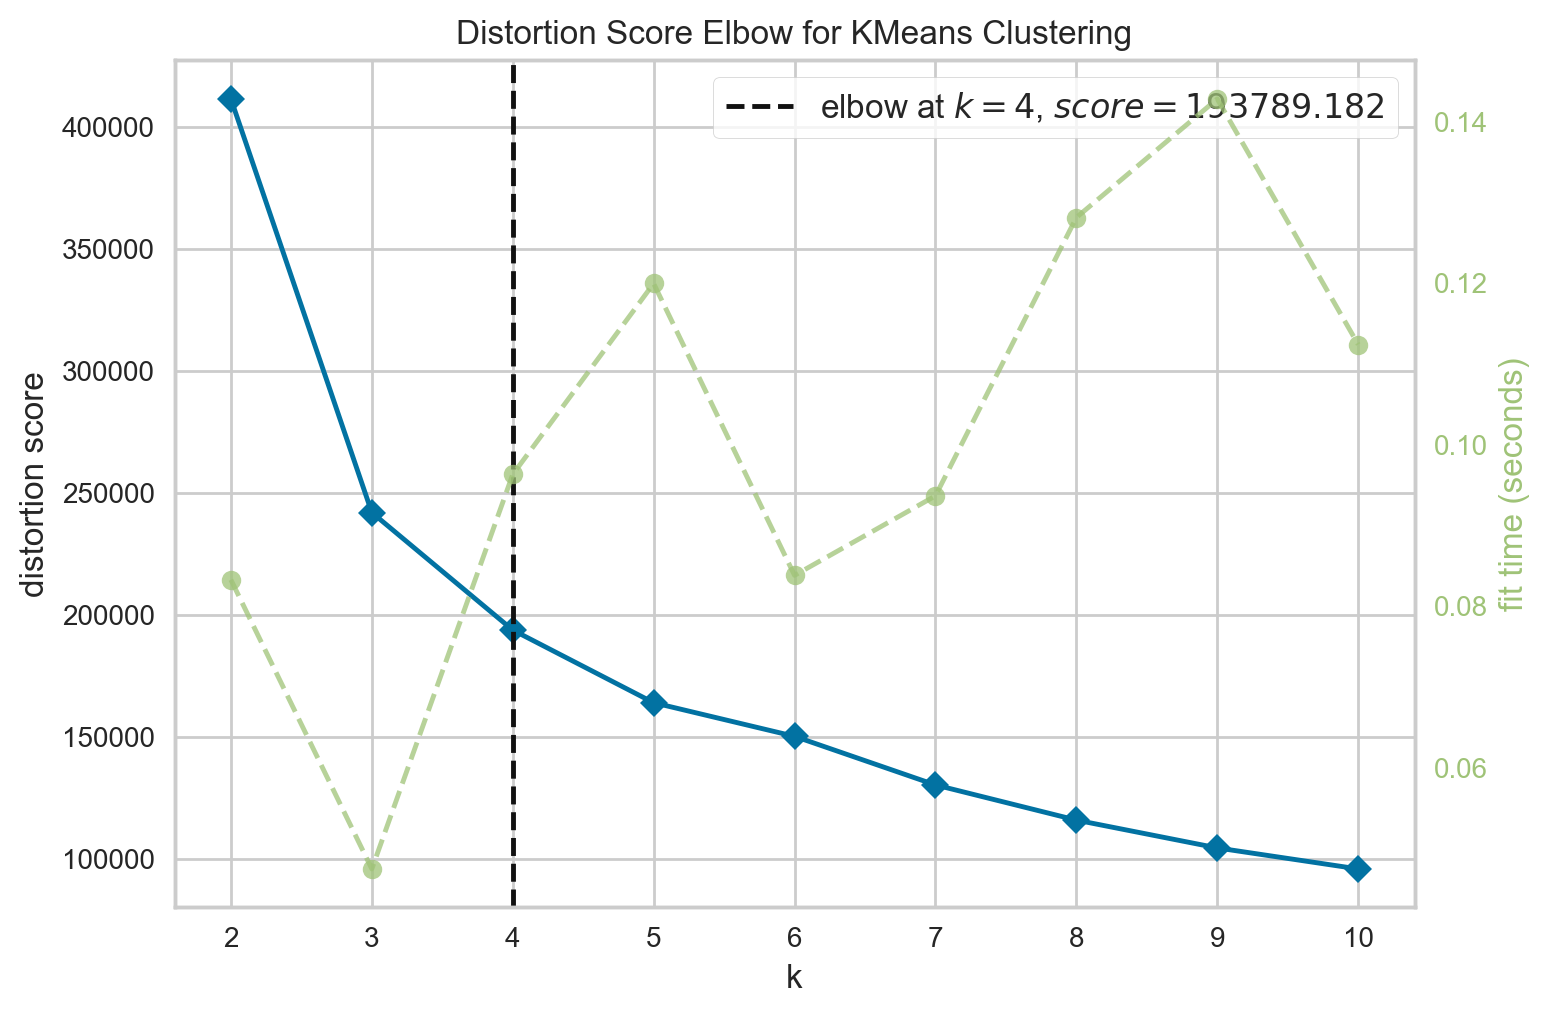

In [29]:
# KElbowVisualizer로 적절한 군집수 찾기
from yellowbrick.cluster import KElbowVisualizer

KEV = KElbowVisualizer(kmeans, k=10, n_init='auto')
KEV.fit(X)
KEV.show();

In [31]:
# 4개가 적당!
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')
kmeans.fit(X)

KMeans(n_clusters=4, n_init='auto', random_state=42)

In [32]:
# 예측 결과 합쳐보기 rfm_fin 분포 퍼지게 한거
rfm_final['Cluster'] = kmeans.labels_
rfm_final

Recency  Frequency  MonetaryValue  Cluster
user_id                                              
315835876        7   0.693147       5.141020        1
366237542       12   0.693147       4.851249        1
389051600       20   0.693147       5.442028        1
403013066       44   0.693147       5.439035        0
415873351       31   0.693147       5.576176        0
...            ...        ...            ...      ...
579953265        1   0.693147       7.342883        3
579953464        1   0.693147       4.829194        1
579956024        1   0.693147       5.645765        1
579966375        1   0.693147       4.829194        1
579967058        1   0.693147       4.829194        1

[192790 rows x 4 columns]

In [33]:
# 예측 결과 합쳐보기 rfm 원래분포
rfm['Cluster'] = kmeans.labels_
rfm

Recency  Frequency  MonetaryValue  Cluster
user_id                                              
315835876        7          1     169.889999        1
366237542       12          1     126.900002        1
389051600       20          1     229.910004        1
403013066       44          1     229.220001        0
415873351       31          1     263.059998        0
...            ...        ...            ...      ...
579953265        1          1    1544.160034        3
579953464        1          1     124.110001        1
579956024        1          1     282.089996        1
579966375        1          1     124.110001        1
579967058        1          1     124.110001        1

[192790 rows x 4 columns]

In [34]:
# 나늰 것 빈도수 보기
pd.Series(kmeans.labels_).value_counts()
# 1, 2, 0, 3 순으로 많음

1    68651
0    66994
3    44560
2    12585
dtype: int64

In [35]:
# 군집 중심 보기
centers = kmeans.cluster_centers_
centers

array([[ 1.12079681, -0.37185749, -0.33962678],
       [-0.71377251, -0.45186422, -0.58731402],
       [-0.50471645,  2.91792083,  2.03029755],
       [-0.43826067,  0.43679898,  0.84840095]])

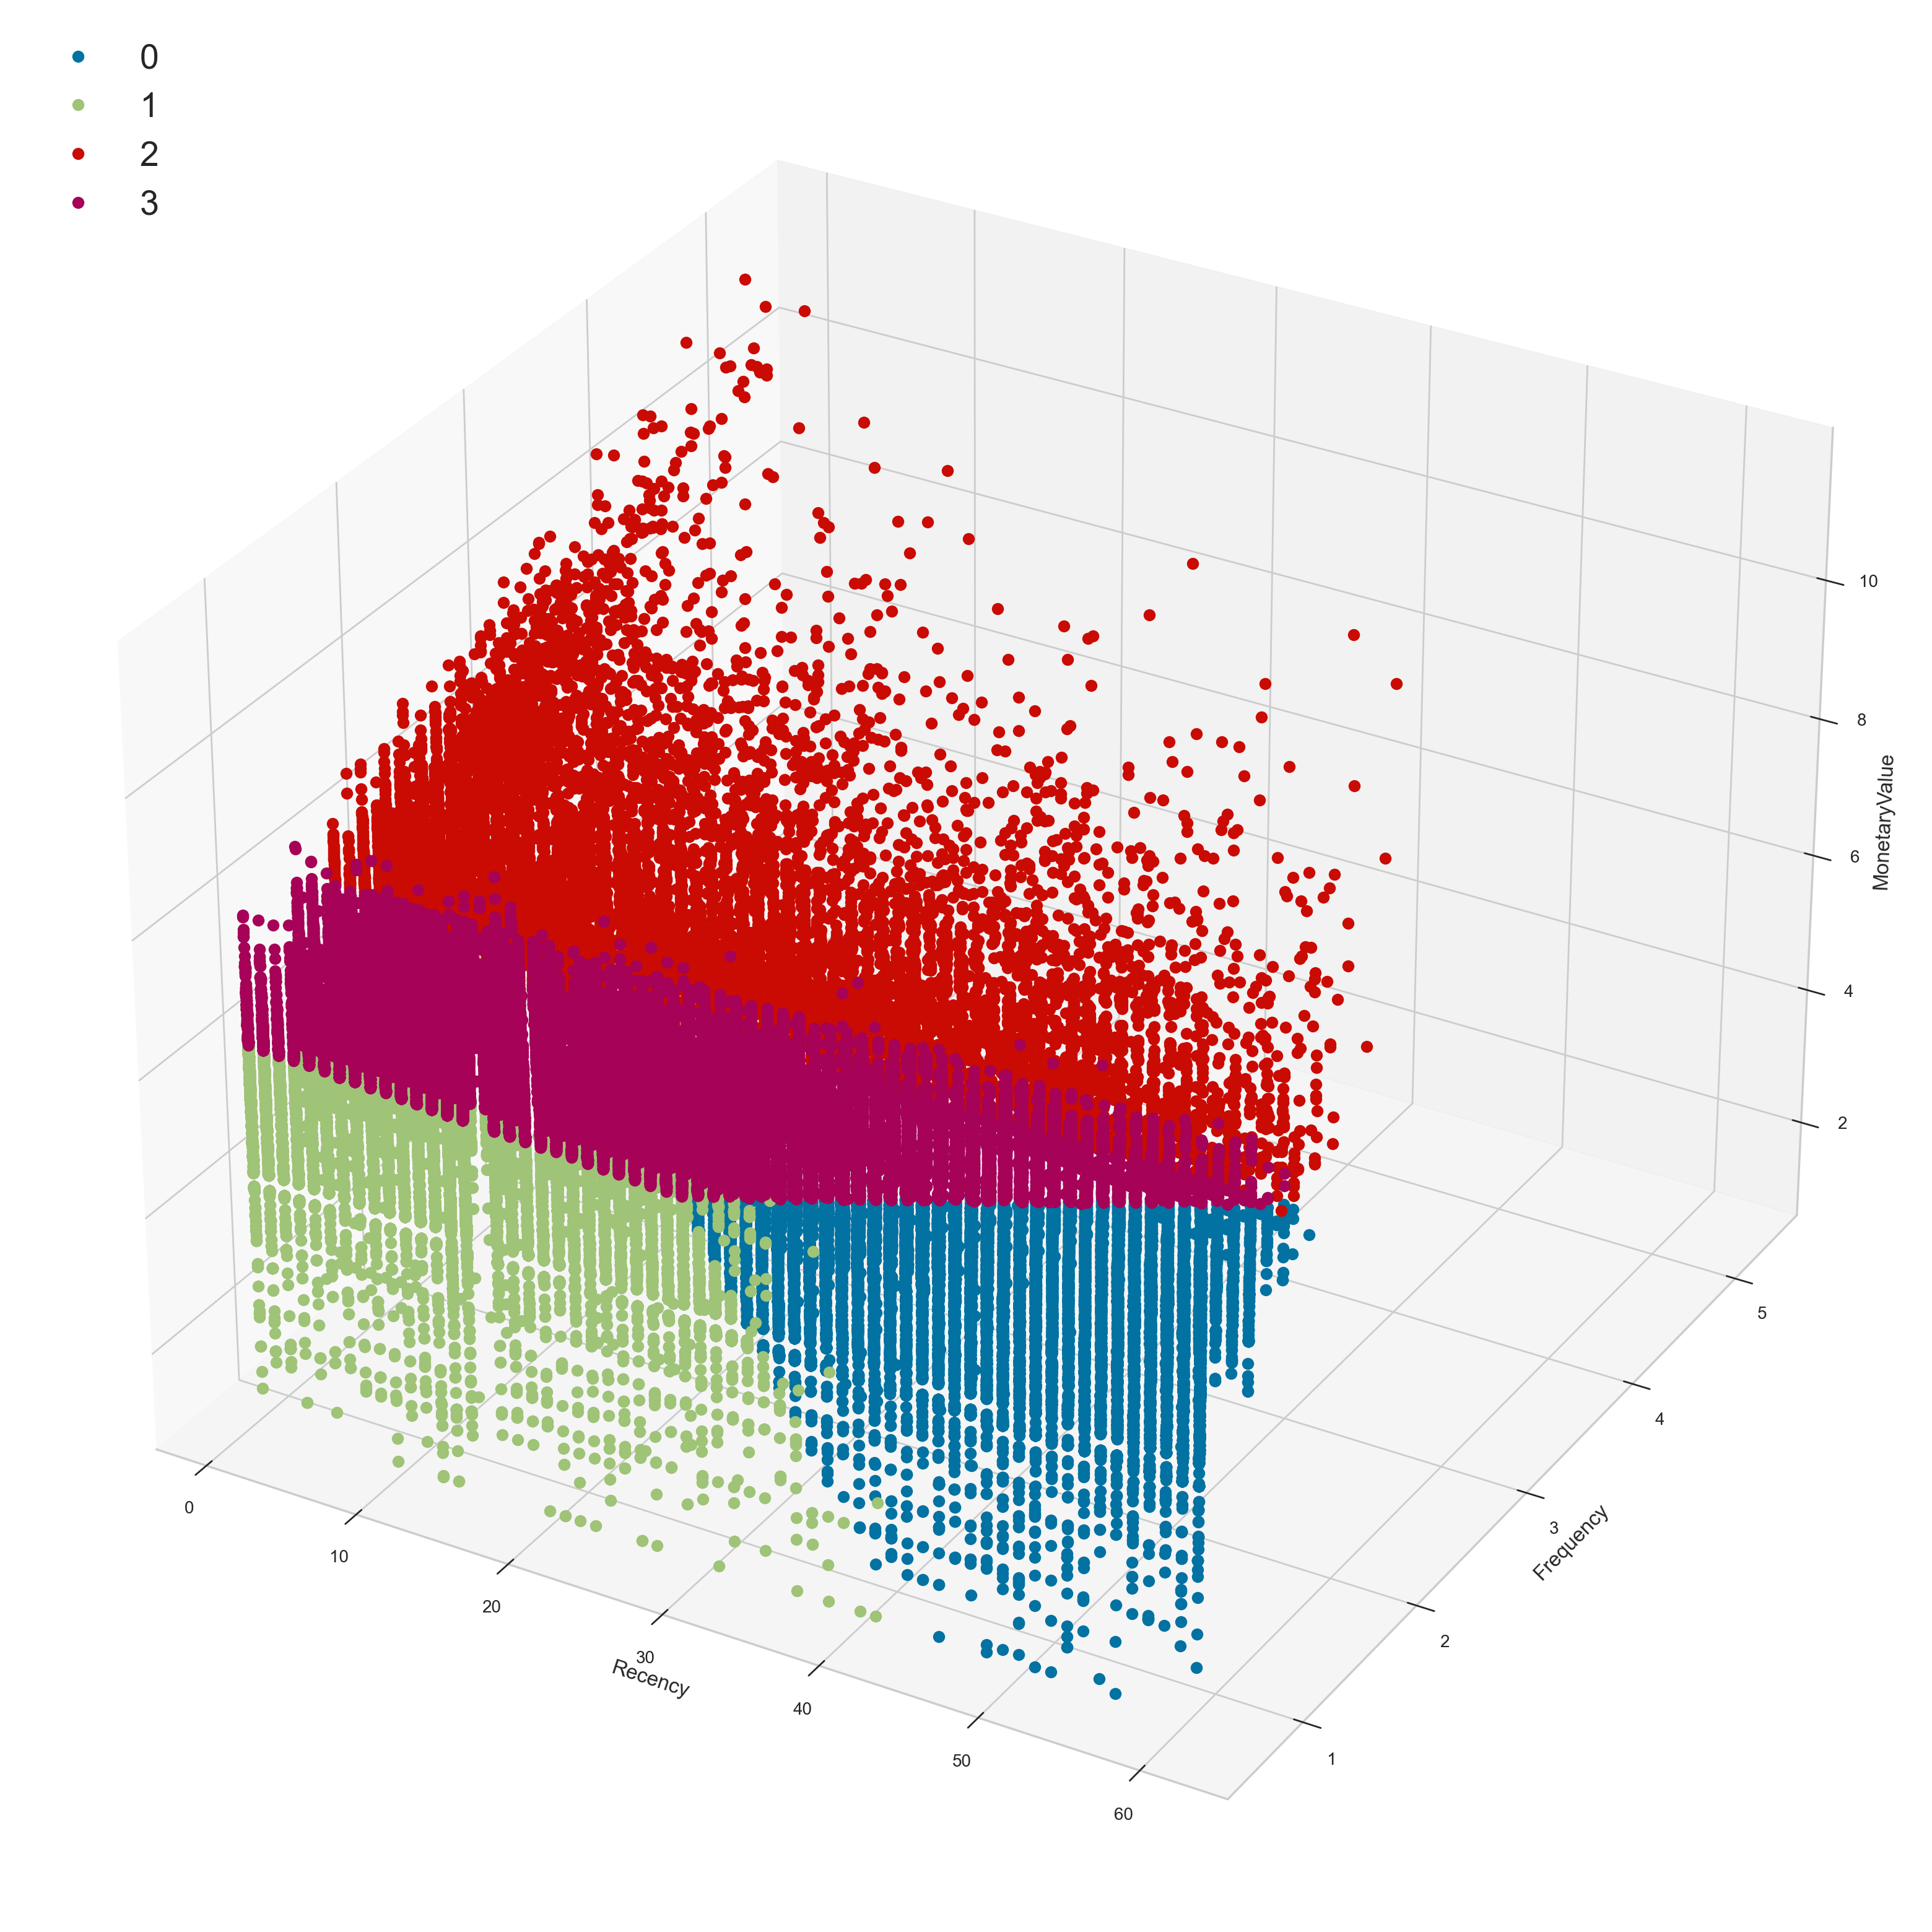

In [36]:
# 3차원으로  시각화하기
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(20, 20))

ax1 = plt.subplot(111, projection='3d')

x0 = rfm_final[rfm_final['Cluster'] == 0]['Recency']
y0 = rfm_final[rfm_final['Cluster'] == 0]['Frequency']
z0 = rfm_final[rfm_final['Cluster'] == 0]['MonetaryValue']

x1 = rfm_final[rfm_final['Cluster'] == 1]['Recency']
y1 = rfm_final[rfm_final['Cluster'] == 1]['Frequency']
z1 = rfm_final[rfm_final['Cluster'] == 1]['MonetaryValue']

x2 = rfm_final[rfm_final['Cluster'] == 2]['Recency']
y2 = rfm_final[rfm_final['Cluster'] == 2]['Frequency']
z2 = rfm_final[rfm_final['Cluster'] == 2]['MonetaryValue']

x3 = rfm_final[rfm_final['Cluster'] == 3]['Recency']
y3 = rfm_final[rfm_final['Cluster'] == 3]['Frequency']
z3 = rfm_final[rfm_final['Cluster'] == 3]['MonetaryValue']

ax1.plot(x0, y0, z0, "o", label="0")
ax1.plot(x1, y1, z1, "o", label="1")
ax1.plot(x2, y2, z2, "o", label="2")
ax1.plot(x3, y3, z3, "o", label="3")

plt.legend(loc="upper left")
ax1.set_xlabel('Recency')
ax1.set_ylabel('Frequency')
ax1.set_zlabel('MonetaryValue')
plt.legend(loc='upper left', fontsize = 20)

plt.show();

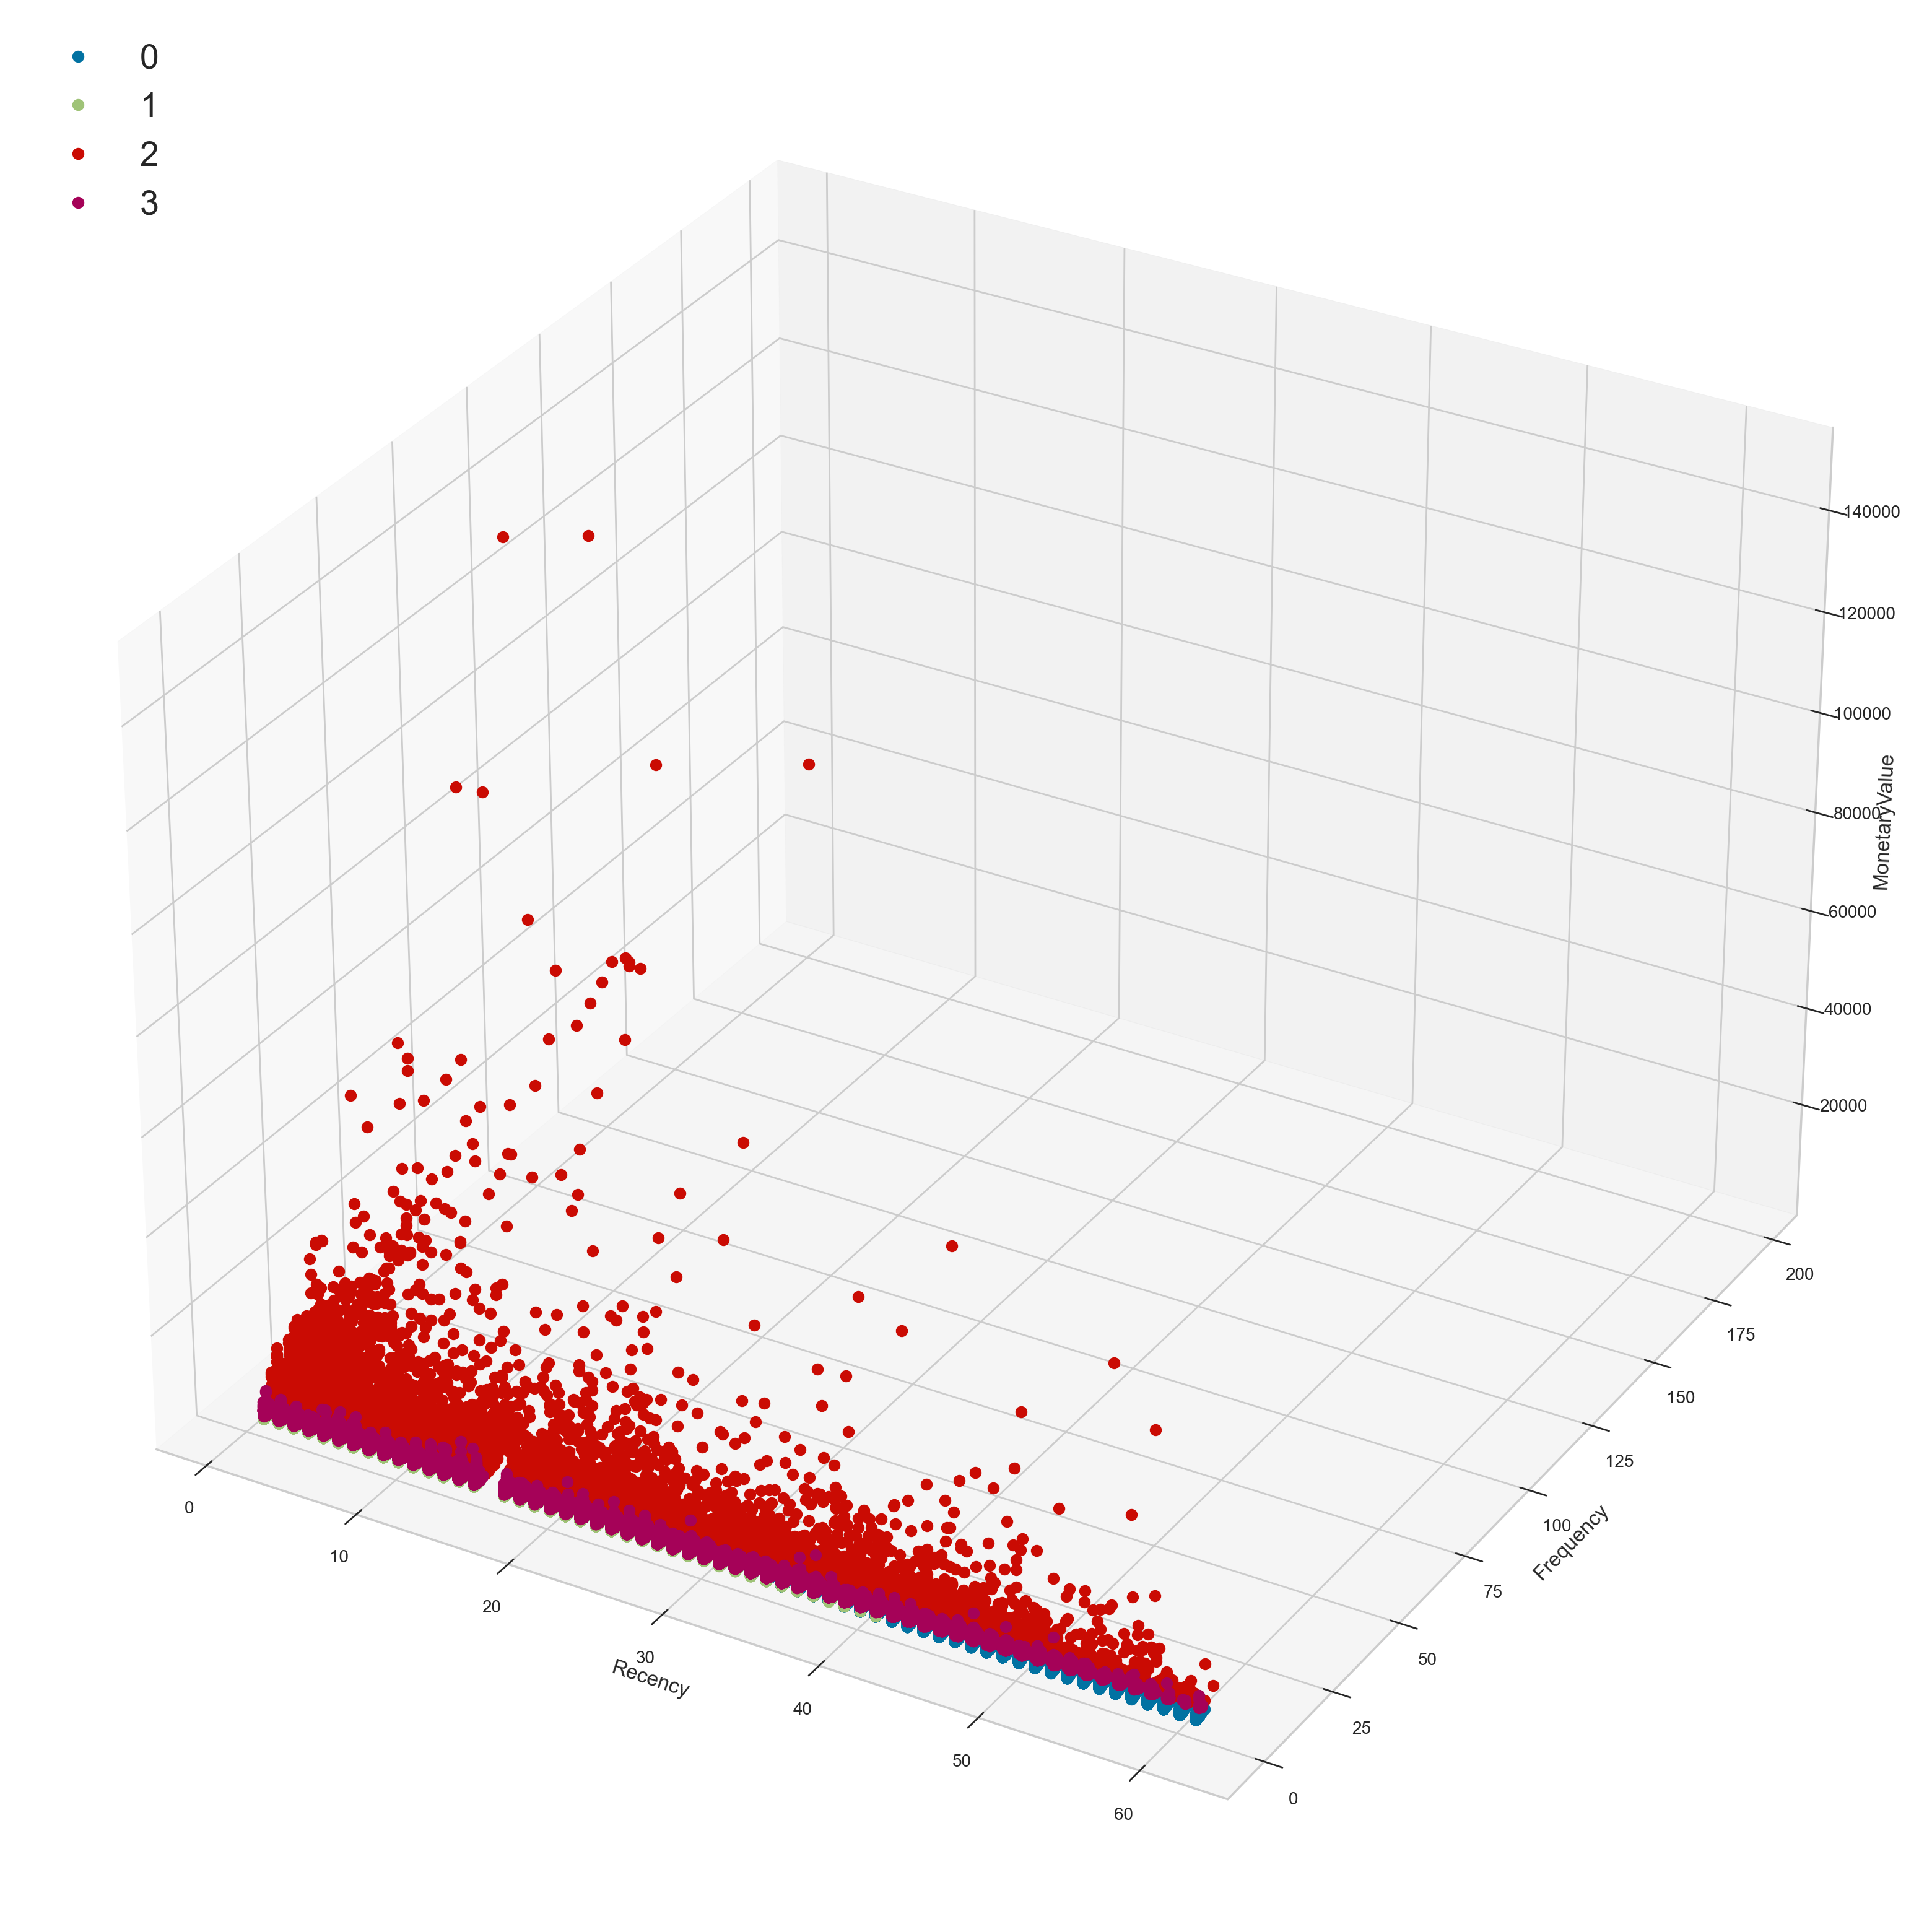

In [37]:
# 3차원으로 시각화하기 rfm 원래 데이터
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(20, 20))

ax1 = plt.subplot(111, projection='3d')

x0 = rfm[rfm['Cluster'] == 0]['Recency']
y0 = rfm[rfm['Cluster'] == 0]['Frequency']
z0 = rfm[rfm['Cluster'] == 0]['MonetaryValue']

x1 = rfm[rfm['Cluster'] == 1]['Recency']
y1 = rfm[rfm['Cluster'] == 1]['Frequency']
z1 = rfm[rfm['Cluster'] == 1]['MonetaryValue']

x2 = rfm[rfm['Cluster'] == 2]['Recency']
y2 = rfm[rfm['Cluster'] == 2]['Frequency']
z2 = rfm[rfm['Cluster'] == 2]['MonetaryValue']

x3 = rfm[rfm['Cluster'] == 3]['Recency']
y3 = rfm[rfm['Cluster'] == 3]['Frequency']
z3 = rfm[rfm['Cluster'] == 3]['MonetaryValue']

ax1.plot(x0, y0, z0, "o", label="0")
ax1.plot(x1, y1, z1, "o", label="1")
ax1.plot(x2, y2, z2, "o", label="2")
ax1.plot(x3, y3, z3, "o", label="3")

plt.legend(loc="upper left")
ax1.set_xlabel('Recency')
ax1.set_ylabel('Frequency')
ax1.set_zlabel('MonetaryValue')
plt.legend(loc='upper left', fontsize = 20)

plt.show();